# Supervised learning: Regression
<b>Problem statement</b>:<br>
We are given a collection of samples $\{(\mathbf{x}_i,y_i)\}_{i=1}^N$, where $N$  is the size of the collection, $\mathbf{x}_i$ is the sample vector containing $D$ numeric features, and $y_i$ is a <b>real-valued</b> target attribute. The goal is to find a mathematical function which given a new vector $\mathbf{x}_k$ of features will predict the target value $y_k$.

In <b>Linear Regression</b> we assume that this mapping function has the following form:
$$f(\mathbf{x})=\mathbf{w}\mathbf{x} + b$$

Here $\mathbf{w}$ is a $D$-dimensional vector of parameters (weights) and $b$ is a constant.<br>
The goal is to discover (learn) $f$ from data. Then we can use $f$ to predict $y$ given the feature vector for a new, unknown observation $\mathbf{x}$: $y \leftarrow f(\mathbf{x})$.<br>
For example, if $\mathbf{x}$ has only a single feature (dimension) then we are looking for an equation of the line which fits the relationship between  $\mathbf{x}$ and $y$ as close as possible:
<img src="images/linear_regr_example.png">

<b>Solution:</b><br>
Thus, to find coefficients $\mathbf{w}$ and $b$ of the best-fitting line, we need to minimize the following expression:

$$SSR=\frac{1}{N} \Sigma_{i=1}^N(f_{\mathbf{w},b}(x_i) - y_i)^2$$

The expression we are trying to minimize is called an <em>objective function</em>. The expression $(f(x_i) - y_i)^2$ is called the <em>loss function</em>. It is an absolute (squared) difference between the value predicted by the model and the empirical observation. 

In Linear Regression, the loss function is also called the $SSR$ -- the average of the <b>Sum of Squared Residuals</b> computed by the above formula. $SSR$ averages all discrepancies between the model and observed data points.<br>

The loss function above is easily differentiable: if we calculate its derivative (gradient) and set it to zero, then we can just solve a system of linear equations to get optimal values of $\mathbf{w}$ and $b$.
(As we know from Calculus: to find the minimum or the maximum of a function, we set the gradient to zero because the value of the gradient at extrema of a function is always zero.)

## Predicting home prices
Given a vector containing features of a house, we want to be able to predict its price. To build a predictive regression model, we use the dataset ''House Sales in King County, USA'', the same dataset we used for the KNN-lab.<br>

Download the data file [housing.csv](https://drive.google.com/file/d/1s_muxczF8K4qs5mIohZItlb0b6jA4Rhc/view?usp=sharing) to your local directory.<br>
__Update the variable `file_name` in the cell below to point to your local directory where you store the datasets for this course__ and then run the cell.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

file_name = "../data_sets/housing.csv"

## 1. Simple Linear Regression

### 1.1. Explore the data
After some modifications and preprocessing of the original data, we have the following all-numeric features:
<ul>
    <li>id - house identifier, numeric.</li>
    <li>price - house price, numeric. <b>This is the target variable that we are trying to predict</b>.</li>
    <li>bedrooms - no. of bedrooms, numeric.</li>
    <li>bathrooms - no. of bathrooms, numeric.</li>
    <li>sqft_living - square footage of the home, numeric.</li>
    <li>sqft_lot - square footage of the lot, numeric.</li>
    <li>floors - no.of floors, numeric.</li>
    <li>waterfront - has a view to a waterfront, numeric (0 or 1).</li>
    <li>condition - the amount of wear-and-tear, numeric (from 0 to 5).</li>
    <li>sqft_above - square footage of house apart from basement, numeric.</li>
    <li>sqft_basement - square footage of the basement, numeric.</li>
    <li>age - number of years since year built to year sold, numeric.</li>
</ul>

In [2]:
data = pd.read_csv(file_name, index_col='id')
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,age
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,3.409430,1788.390691,291.509045,43.317818
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.650743,828.090978,442.575043,29.375493
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,290.000000,0.000000,-1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,3.000000,1190.000000,0.000000,18.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,1560.000000,0.000000,40.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,4.000000,2210.000000,560.000000,63.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,9410.000000,4820.000000,115.000000


#### Normalizing features

Here we are dealing with vectors. Before fitting data points into a model, we want to normalize numeric values to make different dimensions comparable. 

We are going to use `StandardScaler` from sklearn library, described [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler). This scaler standardizes features by subtracting the mean and scaling to unit variance.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the dataset. Mean and standard deviation are then stored to be used on later data using `transform`.

In [3]:
# target values - home price
Y = data['price'] 

# feature vectors
X = data[['bedrooms','bathrooms', 'sqft_living','sqft_lot',
          'floors', 'waterfront', 'condition', 'sqft_above', 
          'sqft_basement', 'age']] 

# converting to numpy arrays
X=X.values.reshape(len(X),len(X.columns)) 
Y=Y.values.reshape(len(Y),1) 


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
print(X[5:])

[[ 0.67648506  3.09713317  3.63679094 ...  2.53795535  2.79843978
  -1.03210249]
 [-0.39873715  0.1756067  -0.39731264 ... -0.08862841 -0.65868104
  -0.82784588]
 [-0.39873715 -0.79823546 -1.11049425 ... -0.8796226  -0.65868104
   0.29556552]
 ...
 [-1.47395936 -1.77207762 -1.15404732 ... -0.92792759 -0.65868104
  -1.30444465]
 [-0.39873715  0.50022075 -0.52252773 ... -0.22750526 -0.65868104
  -1.10018803]
 [-1.47395936 -1.77207762 -1.15404732 ... -0.92792759 -0.65868104
  -1.27040188]]


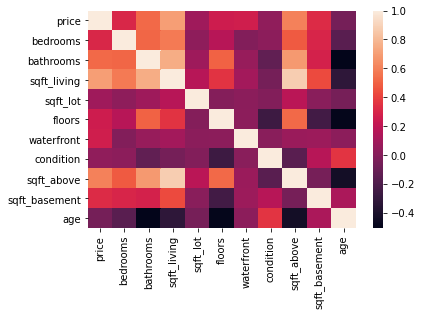

In [4]:
# Is there any correlation between features?
corr = data.corr()
sns.heatmap(corr)

It seems that <em>sqft_living</em> and <em>sqft_above</em> have 
a positive influence on price, and the house age has the most negative influence.

### 1.2. Build the initial model

We start with linear regression using just two dimensions - trying to find the best-fitting line which describes the relationships between _square foots of living space_ and _home price_.

In [5]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [6]:
Y = data['price'] 
X = data['sqft_living'] 

# convert to numpy vectors (1D vectors in this case)
X=X.values.reshape(len(X),1) 
Y=Y.values.reshape(len(Y),1) 

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
print(X[5:])

[[ 3.63679094]
 [-0.39731264]
 [-1.11049425]
 ...
 [-1.15404732]
 [-0.52252773]
 [-1.15404732]]


In [7]:
# Split the data into training/testing sets 2:1
split_n = len(X)//3 
X_train = X[:-split_n] 
X_test = X[-split_n:] 
   
# Split the targets into training/testing sets 
Y_train = Y[:-split_n] 
Y_test = Y[-split_n:] 

In [8]:
# Train the model using the training set 
regr.fit(X_train, Y_train)   

LinearRegression()

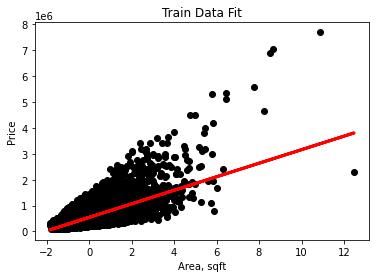

In [9]:
# Plot data points
plt.scatter(X_train, Y_train,  color='black') 
plt.title('Train Data Fit') 
plt.xlabel('Area, sqft') 
plt.ylabel('Price') 

# Plot regression line 
plt.plot(X_train, regr.predict(X_train), color='red',linewidth=3) 
plt.show() 

### 1.3. Model evaluation
The _coefficient of determination_, denoted as $R^2$, tells you which amount of variation in $𝑦$ is explained by the variance in $\mathbf{𝐱}$, according to our regression model. Larger $R^2$ indicates a better model.<br>
The value $R^2=1.0$ corresponds to $SSR = 0$, that is to the perfect fit since the values of predicted and actual responses fit completely with each other.

In [10]:
r_sq = regr.score(X_train,Y_train)
print('intercept:', regr.intercept_)
print('slope:', regr.coef_)
print("Coefficient of determination for train data:", r_sq)

intercept: [541377.21119381]
slope: [[261773.93107442]]
Coefficient of determination for train data: 0.4915940045103643


How would this model perform on new data?

In [11]:
r_sq_test = regr.score(X_test,Y_test)
print("Coefficient of determination for test data:", r_sq_test)

Coefficient of determination for test data: 0.49377143659205625


### 1.4. Prediction
Now let's take two houses from the dataset and imagine that we want to estimate their prices using our model. The area of the first house is $830$ sqft and the price is \\$85,000. The second house with the area of $7300$ sqft and was sold for \\$5,300,000.


In [12]:
x = [[830.0], [7390.0]]
y = [85000.0, 5300000.0]

x, y = np.array(x), np.array(y)

print("original:", x)
# normalizing - to be consistent with the model
# scaler remembers all necessary statistics 
x = scaler.transform(x)

print("normalized:", x)

original: [[ 830.]
 [7390.]]
normalized: [[-1.36092443]
 [ 5.78177989]]


In [13]:
np.set_printoptions(precision=2)

y_pred = regr.predict(x)
print('predicted price:', y_pred)
print('actual price', y)

predicted price: [[ 185122.67]
 [2054896.46]]
actual price [  85000. 5300000.]


#### CONCLUSION
The area of the living space contributes about 49% of the variance in prices. The predictive power of a single (even best-correlated) feature is low.

## 2. Multiple Linear Regression
<em>Multiple</em> or Multivariate Linear Regression is used in cases when we have two or more features to predict the target.

If there are just two features, the regression function becomes: 
$$f(x_1, x_2) = b + w_1x_1 + w_2x_2$$ 
It represents a regression plane in a three-dimensional space.<br> 
The task becomes to determine the values of the $b$, $w_1$ and $w_2$, such that this plane is as close as possible to the actual responses and yields the minimal $SSR$.<br>
In general case with $D>2$ features -- the function has the form:
$$f(x_1, \ldots, x_D) = b + w_1x_1 + \ldots + w_Dx_D$$
and there are $D+1$ parameters to learn. 

### 2.1. Build the model
The process is performed as before, but we use all 10 features as input variables.

In [14]:
Y = data['price'] 
X = data[['bedrooms','bathrooms', 'sqft_living','sqft_lot',
          'floors', 'waterfront', 'condition', 'sqft_above', 
          'sqft_basement', 'age']] 

X=X.values.reshape(len(X),len(X.columns)) 
Y=Y.values.reshape(len(Y),1) 

# scale feature vectors
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
print(X[5:])

[[ 0.68  3.1   3.64 ...  2.54  2.8  -1.03]
 [-0.4   0.18 -0.4  ... -0.09 -0.66 -0.83]
 [-0.4  -0.8  -1.11 ... -0.88 -0.66  0.3 ]
 ...
 [-1.47 -1.77 -1.15 ... -0.93 -0.66 -1.3 ]
 [-0.4   0.5  -0.52 ... -0.23 -0.66 -1.1 ]
 [-1.47 -1.77 -1.15 ... -0.93 -0.66 -1.27]]


In [15]:
# Split the data into training/testing sets 
split_n = len(X)//3 
X_train = X[:-split_n] 
X_test = X[-split_n:] 
   
# Split the targets into training/testing sets 
Y_train = Y[:-split_n] 
Y_test = Y[-split_n:] 

# fit the hyperplane - find coefficients
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

### 2.2. Evaluate multivariate model
Does this model predict better than the single-variable model?

In [16]:
r_sq_train = regr.score(X_train,Y_train)
print("Coefficient of determination for train data:", r_sq_train)
print('intercept:', regr.intercept_)
print('slope:', regr.coef_)

r_sq_test = regr.score(X_test,Y_test)
print("Coefficient of determination for test data:", r_sq_test)

Coefficient of determination for train data: 0.5939378265752664
intercept: [534280.26]
slope: [[-5.77e+04  4.95e+04  3.06e+17 -1.17e+04  1.25e+04  6.79e+04  1.08e+04
  -2.76e+17 -1.48e+17  9.96e+04]]
Coefficient of determination for test data: 0.5646370459195997


If $R^2$ score is significantly better for the train data than for the test data - this is a sign of overfitting: we followed too closely to the training data points and the model failed to generalize. 

### 2.3. Prediction
What about our two houses?

In [17]:
x = [[2,1,830,9000,1,0,3,830,0,75], [6,6,7390,24829,2,1,4,5000,2390,24]]
y = [85000, 5300000]

x, y = np.array(x), np.array(y)

print("original:", x)
# normalizing - to be consistent with the model
# scaler remembers all necessary statistics 
x = scaler.transform(x)

print("normalized:", x)

original: [[    2     1   830  9000     1     0     3   830     0    75]
 [    6     6  7390 24829     2     1     4  5000  2390    24]]
normalized: [[-1.47 -1.45 -1.36 -0.15 -0.92 -0.09 -0.63 -1.16 -0.66  1.08]
 [ 2.83  5.04  5.78  0.23  0.94 11.47  0.91  3.88  4.74 -0.66]]


In [18]:
y_pred = regr.predict(x)
print('predicted price:', y_pred)
print('actual price', y)

predicted price: [[ 253768.26]
 [2921096.26]]
actual price [  85000 5300000]


## 3. Polynomial Regression

We might suggest that maybe the dependence between input and target variables is not linear, but polynomial. 

In other words, in addition to linear terms like $w_1x_1$, our regression function $f$ should include non-linear terms such as $w_2x_1^2$, $w_3x_1^3$, or even $w_4x_1x_2$, $w_5x_1^2x_2$, and so on.

The simplest example of polynomial regression in the case of a single input variable is a polynomial of degree 2: 
$$f(x) = b + w_1x + w_2x^2$$.

Now, we want to compute $b$, $w_1$ and $w_2$.  
Keeping this in mind, compare the polynomial regression function with the function $f(x) = b + w_1x_1 + w_2x_2$ used for linear regression. They look very similar and are both linear functions with the unknown coefficients $b$, $w_1$ and $w_2$. This is why we can solve the polynomial regression problem as a linear problem with the term $x^2$ regarded as an additional input variable.

In the case of two variables and the polynomial of degree 2, the regression function has this form: 

$$f([x_1, x_2]) = b + w_1x_1 + w_2x_2 + w_3x_1^2 + w_4x_2^2  + w_5x_1x_2$$. 

The algorithm for solving this problem is exactly the same: we apply linear regression learning to 5 input variables: $x_1$, $x_2$, $x_1^2$, $x_2^2$, and $x_1x_2$.  As the result we get the values of six weights which minimize $SSR$: $b$, $w_1$, $w_2$, $w_3$, $w_4$ and $w_5$.

### 3.1. Adding derived features
All we need to do, is to add some artificial columns to the dataset. We use the `PolynomialFeatures` from the `sklearn.preprocessing` module. 

In [19]:
from sklearn.preprocessing import PolynomialFeatures

### 3.2. Polynomial regression with a single variable
Let's start with a single input variable -- <code>sqft_living</code>, and the polinomial of degree 2.

In [20]:
data = pd.read_csv(file_name, index_col='id')

Y = data['price'] 
X = data['sqft_living'] 

# convert to numpy vectors (1D vectors in this case)
X=X.values.reshape(-1,1) 
Y=Y.values.reshape(-1,1) 

print(X[5:])
print(Y[5:])

[[5420]
 [1715]
 [1060]
 ...
 [1020]
 [1600]
 [1020]]
[[1230000.]
 [ 257500.]
 [ 291850.]
 ...
 [ 402101.]
 [ 400000.]
 [ 325000.]]


In [21]:
# normalize X
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
print(X[5:])

[[ 3.64]
 [-0.4 ]
 [-1.11]
 ...
 [-1.15]
 [-0.52]
 [-1.15]]


Now let's generate an additional column: $x^2$.

In [22]:
transformer = PolynomialFeatures(degree=2)
transformer.fit(X)
X = transformer.transform(X)

print(transformer.get_feature_names(["sqft_living"]))
print(X[5:])

['1', 'sqft_living', 'sqft_living^2']
[[ 1.    3.64 13.23]
 [ 1.   -0.4   0.16]
 [ 1.   -1.11  1.23]
 ...
 [ 1.   -1.15  1.33]
 [ 1.   -0.52  0.27]
 [ 1.   -1.15  1.33]]


In [23]:
# Split the data into training/testing sets 
split_n = len(X)//3 
X_train = X[:-split_n] 
X_test = X[-split_n:] 
   
# Split the targets into training/testing sets 
Y_train = Y[:-split_n] 
Y_test = Y[-split_n:] 

The dataset now contains an additional column $x^2$.<br>
Everything else is performed exactly as before, but we use `X_train` with more columns than before.

In [24]:
# Train the model as before
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)    
   
r_sq_train = regr.score(X_train,Y_train)
print("Coefficient of determination for train data:", r_sq_train)

r_sq_test = regr.score(X_test,Y_test)
print("Coefficient of determination for test data:", r_sq_test)

Coefficient of determination for train data: 0.536573746585831
Coefficient of determination for test data: 0.5236786634386175


#### Conclusion
Adding polynomial features significantly improved the power of our model: now the living area contributes about 53% to the variance in prices, comparing with 49% with a strictly linear model.

### 3.3. Polynomial regression with all the features
Now we try to improve the model using polynomial regression for all the features.

In [25]:
data = pd.read_csv(file_name, index_col='id')

Y = data['price'] 
X = data[['bedrooms','bathrooms', 'sqft_living','sqft_lot',
          'floors', 'waterfront', 'condition', 'sqft_above', 
          'sqft_basement', 'age']] 

# convert to numpy vectors 
X=X.values.reshape(len(X),len(X.columns)) 
Y=Y.values.reshape(len(Y),1) 

# normalize X
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

# Add polynomial features
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(X)
X = transformer.transform(X)

# Split the data into training/testing sets 
split_n = len(X)//3 
X_train = X[:-split_n] 
X_test = X[-split_n:] 
   
# Split the targets into training/testing sets 
Y_train = Y[:-split_n] 
Y_test = Y[-split_n:] 

print(X_train[0][0], X_train[0][1], X_train[0][10], X_train[0][11] )

-0.3987371485515761 -1.4474635685648216 0.15899131363504168 0.5771574959618258


The modified input array contains additional columns: one with the original feature, the other with its square plus the multiplications to the values in all other columns.

The model learning algorithm does not change:

In [26]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

r_sq_train = regr.score(X_train,Y_train)
print("Coefficient of determination for train data:", r_sq_train)

Coefficient of determination for train data: 0.6640072157038772


In [27]:
r_sq_test = regr.score(X_test,Y_test)
print("Coefficient of determination for test data:", r_sq_test)

Coefficient of determination for test data: 0.5977472106941717


#### Conclusion
This model does not perform well: the training set is fitted better, but the model failed to generalize to a new data. This is the case of __overfitting__. The polynomial model we created is too complex to describe this dataset.

### 3.4. Prediction
What about our two houses?

In [28]:
x = [[2,1,830,9000,1,0,3,830,0,75], [6,6,7390,24829,2,1,4,5000,2390,24]]
y = [85000, 5300000]

x, y = np.array(x), np.array(y)

print("original:", x)
# normalizing - to be consistent with the model
# scaler remembers all necessary statistics 
x = scaler.transform(x)

print("normalized:", x)

original: [[    2     1   830  9000     1     0     3   830     0    75]
 [    6     6  7390 24829     2     1     4  5000  2390    24]]
normalized: [[-1.47 -1.45 -1.36 -0.15 -0.92 -0.09 -0.63 -1.16 -0.66  1.08]
 [ 2.83  5.04  5.78  0.23  0.94 11.47  0.91  3.88  4.74 -0.66]]


In [29]:
# adding poly features
transformer.fit(x)
x_ = transformer.transform(x)

y_pred = regr.predict(x_)
print('predicted price:', y_pred)
print('actual price', y)

predicted price: [[ 269156.62]
 [4717423.38]]
actual price [  85000 5300000]


It seems that this is the best we can do so far. Our results using K-NN regressor were even worse. Fortunately, there are other regression techniques suitable for the cases where linear regression doesn’t perform well: Support Vector Regression, Decision Trees, Random Forests, and Neural Networks, to name the few.

Copyright &copy; 2022 Marina Barsky. All rights reserved.